#Group 8 Assignment 2

#Problem 1 Implementation of Navie Baysien Classifier: 

## **Import important libraries**

In [179]:
import numpy as np #to deal with arrays
import pandas as pd #to deal with dataframes
import matplotlib.pyplot as plt #pyplot is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns #for visualization
from sklearn.datasets import load_wine #load the dataset
%matplotlib inline

## **Load the dataset**

In [180]:
#load the dataset
data = load_wine()

In [181]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [182]:
#print the head of the data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [183]:
#descibe the data
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [184]:
#get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [185]:
target = pd.Series(data.target)

In [186]:
target.value_counts()

1    71
0    59
2    48
dtype: int64

In [187]:
df = pd.concat([df,target],axis= 1)

In [188]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


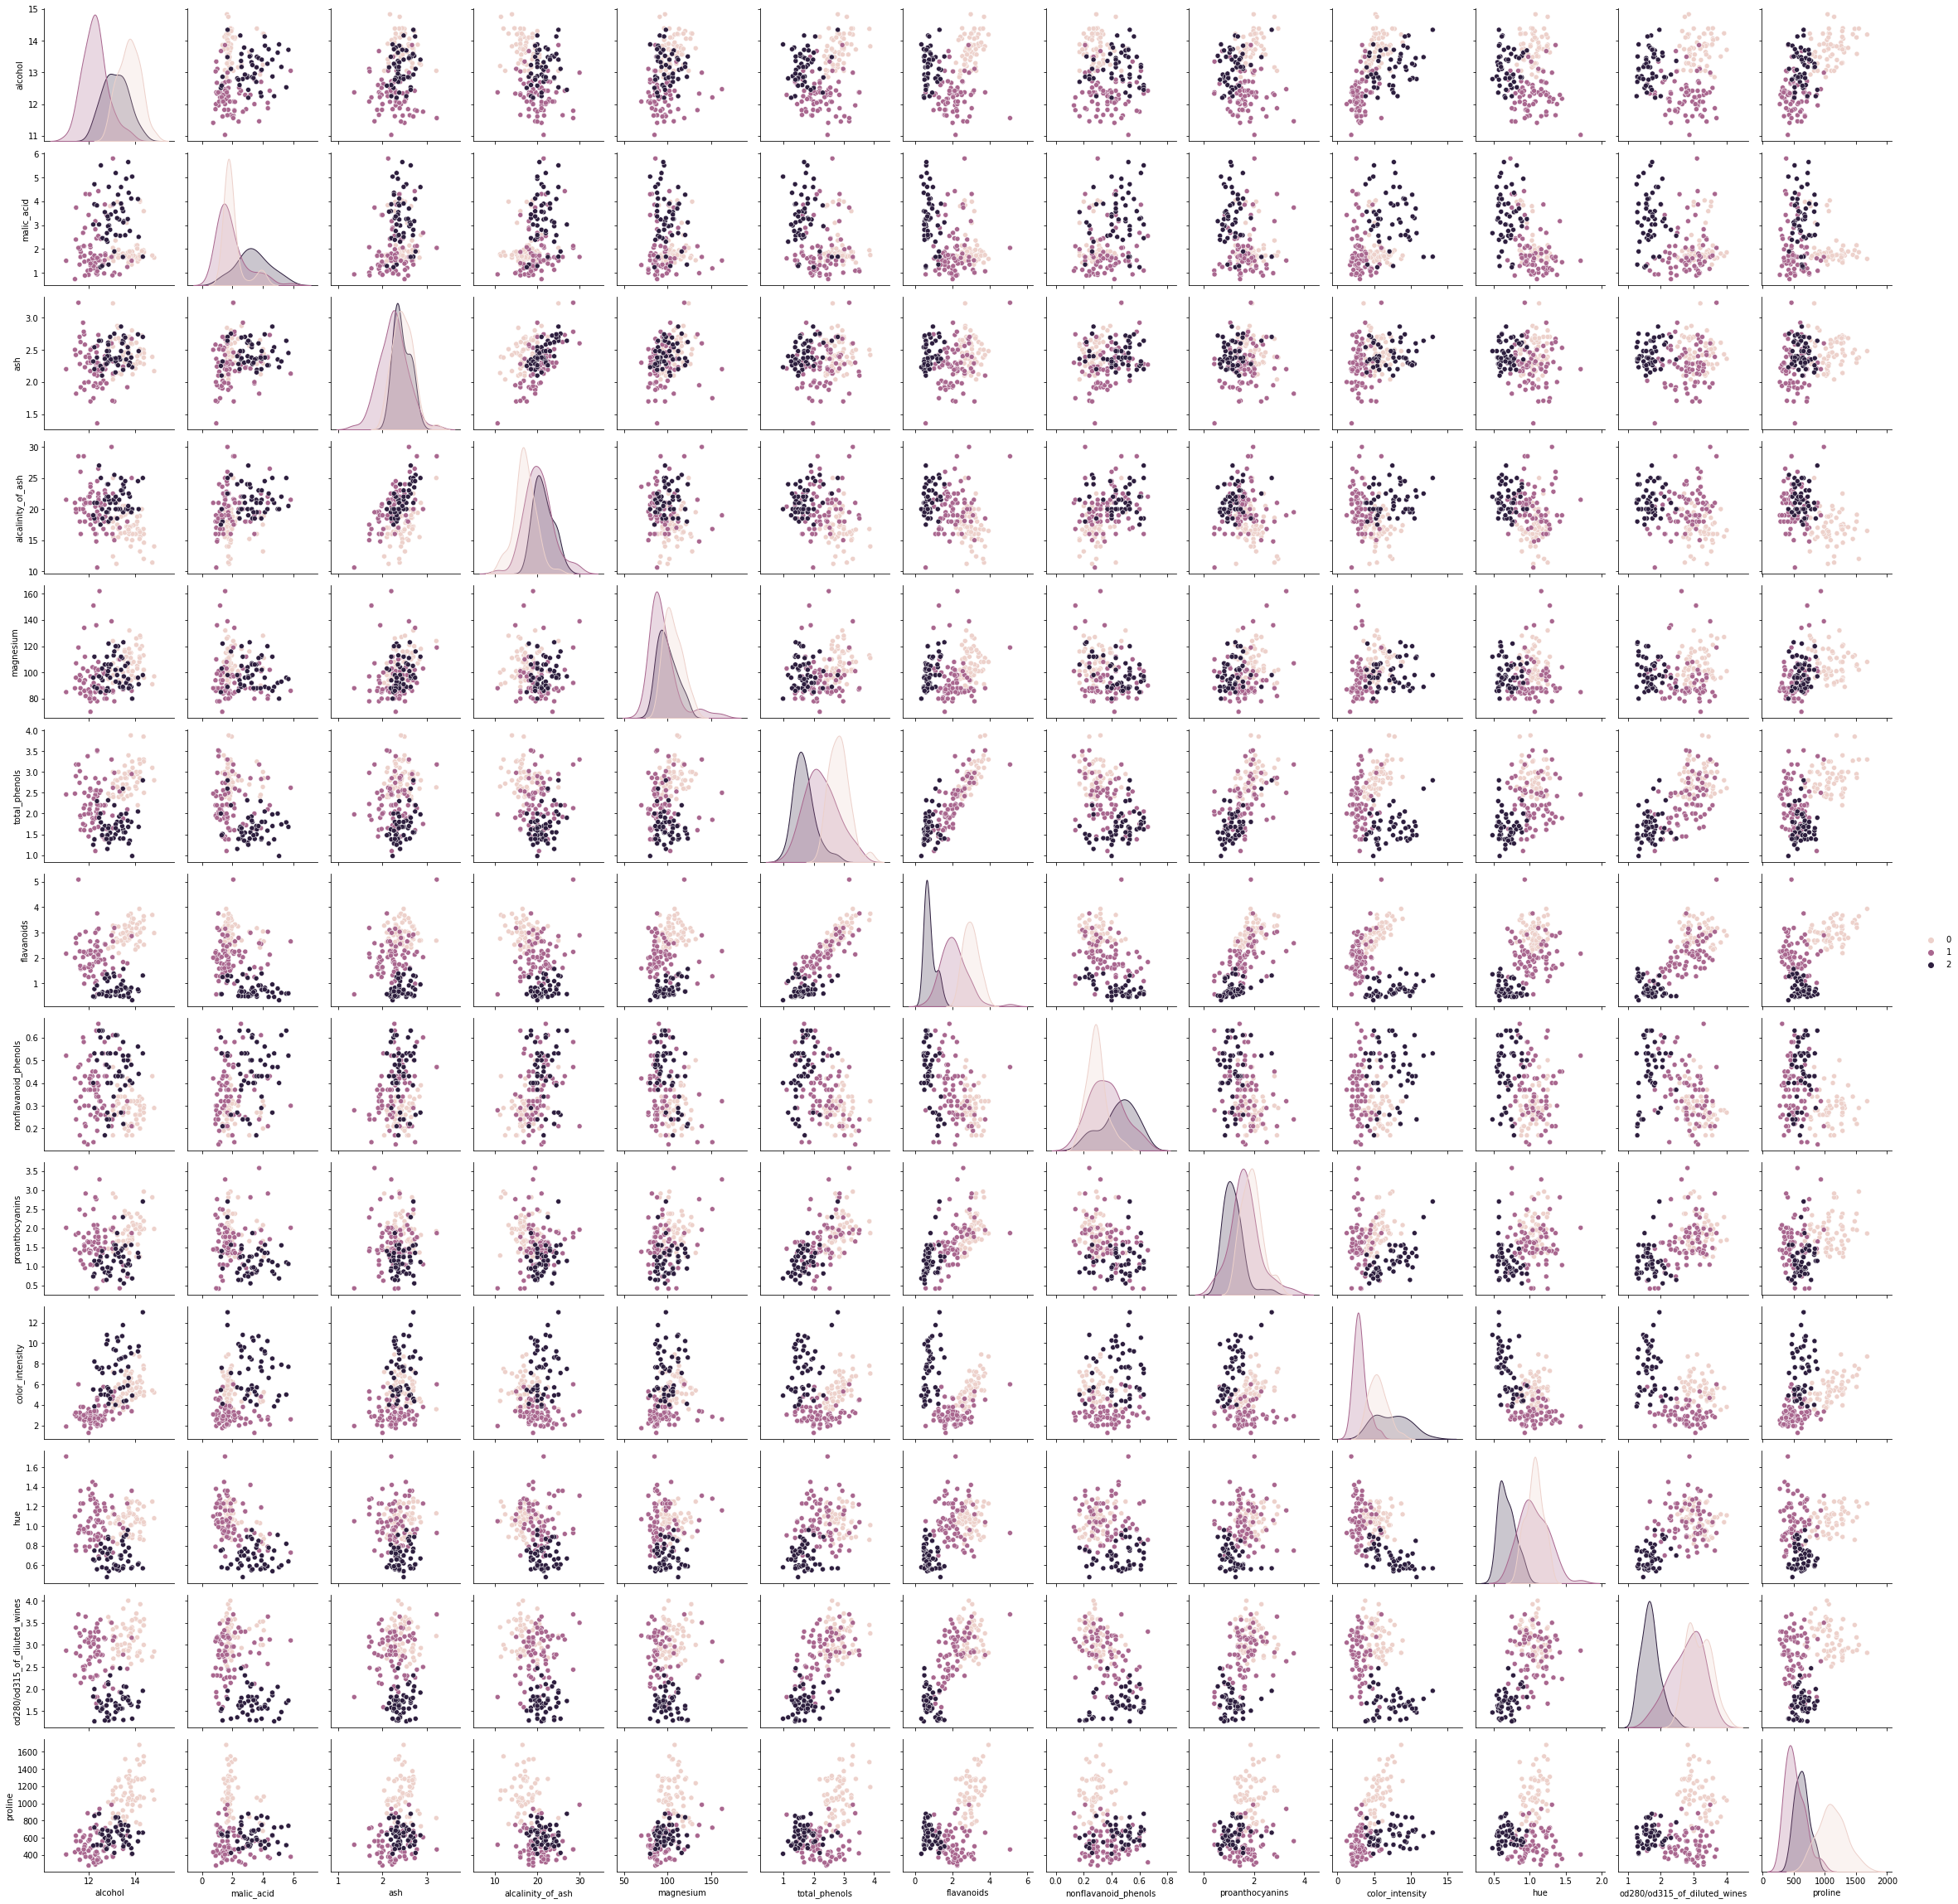

In [189]:
#to view the corelations between the attribues
sns.pairplot(df,hue = 0)

## **a- Split the dataset into train and test dataset**

In [190]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train , y_test = train_test_split(df.drop(0,axis = 1),df[0],test_size = 0.2 ,random_state=42)

In [191]:
#print the x_train data
x_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


**Implement GaussianNB classifier**

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. 

In [192]:
from sklearn.naive_bayes import GaussianNB #to import GaussianNB classifier library
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [193]:
#define y_pred to make the prediction
y_pred = nb.predict(x_test)

## **b- use the classification report to calculate percision, recall and F1 score**

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.

In [194]:
from sklearn.metrics import classification_report #to use the function of classification report
print(classification_report(y_train,nb.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      0.96      0.96        57
           2       0.95      1.00      0.98        40

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


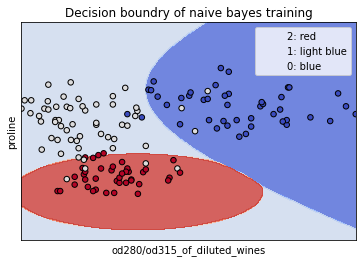

In [195]:
#define the meshgrid function to draw the decision boundary
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of naive bayes training')
# Set-up grid for plotting.
X0, X1 = x_train['proline'], x_train['od280/od315_of_diluted_wines']
xx, yy = make_meshgrid(X0, X1)
#plot the decision boundary on the two features('proline' and 'od280/od315_of_diluted_wines') 
plot_contours(ax, nb.fit(x_train[['proline','od280/od315_of_diluted_wines']], y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('proline')
ax.set_xlabel('od280/od315_of_diluted_wines')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(y_train.unique(),labels =['2: red', '1: light blue', '0: blue'])
plt.show()

plot the decision boundary on test data between 'proline' and 'od280/od315_of_diluted_wines'


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


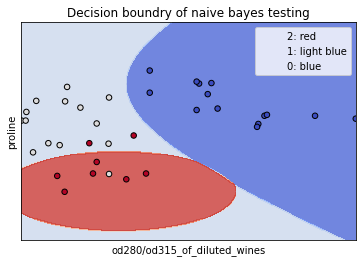

In [196]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of naive bayes testing')
# Set-up grid for plotting.
X0, X1 = x_test['proline'], x_test['od280/od315_of_diluted_wines']
xx, yy = make_meshgrid(X0, X1)
#plot the decision boundary on the two features('proline' and 'od280/od315_of_diluted_wines') 
plot_contours(ax, nb.fit(x_train[['proline','od280/od315_of_diluted_wines']], y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('proline')
ax.set_xlabel('od280/od315_of_diluted_wines')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels =['2: red', '1: light blue', '0: blue'])
plt.show()

#Problem 2: Implement KNN Classifier

## **Load the dataset**

In [197]:
#read the dataset
car = pd.read_csv('/content/car_evaluation.csv')
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [198]:
#get some informations about the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [199]:
#describe the dataset
car.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [200]:
#counting values in each column
for i in car.columns:
  print(car[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: vhigh, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: vhigh.1, dtype: int64
3        432
4        432
5more    432
2        431
Name: 2, dtype: int64
4       576
more    576
2       575
Name: 2.1, dtype: int64
med      576
big      576
small    575
Name: small, dtype: int64
med     576
high    576
low     575
Name: low, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


In [201]:
#perform label encoding 
car['vhigh'] = car['vhigh'].map({'low':0,'med':1,'high':2,'vhigh':3})
car['vhigh.1'] = car['vhigh.1'].map({'low':0,'med':1,'high':2,'vhigh':3})
car['2'] = car['2'].map({'2':0,'3':1,'4':2,'5more':3})
car['2.1'] = car['2.1'].map({'2':0,'4':1,'more':2})
car['small'] = car['small'].map({'small':0,'med':1,'big':2})
car['low'] = car['low'].map({'low':0,'med':1,'high':2})
car['unacc'] = car['unacc'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

In [202]:
#get some information about car dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1727 non-null   int64
 1   vhigh.1  1727 non-null   int64
 2   2        1727 non-null   int64
 3   2.1      1727 non-null   int64
 4   small    1727 non-null   int64
 5   low      1727 non-null   int64
 6   unacc    1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [203]:
#print the head of the data after label encoding
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,0,1,0
1,3,3,0,0,0,2,0
2,3,3,0,0,1,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


## **a- split the dataset to training and testing: data preparation step** 

In [204]:
from sklearn.model_selection import train_test_split
x_train, x ,y_train, y = train_test_split(car.drop('unacc',axis = 1) , car['unacc'],train_size = 1000,random_state = 42,stratify=car['unacc'])
x_val,x_test , y_val , y_test = train_test_split(x,y,test_size = 428,random_state = 42,stratify=y)

In [205]:
print(len(x_test))

428


In [206]:
print(len(x_train))

1000


In [207]:
print(len(x_val))

299


## **b- transform string values into numbers**

In [208]:
def percentage(x_train , y_train ,precentage):
  x_train_prc = x_train.iloc[:int(x_train.shape[0]*precentage)]
  y_train_prc = y_train.iloc[:int(y_train.shape[0]*precentage)]
  return x_train_prc , y_train_prc


In [209]:
prc = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

## **c- plot training set and accuracy score**

Max Validation Accuracy :-  0.8327759197324415
Max test Accuracy :-  0.8785046728971962


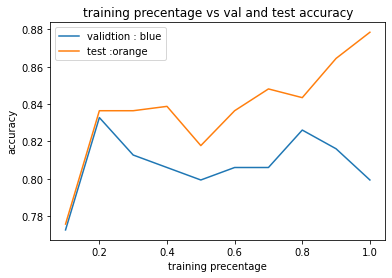

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
val_acc = []
test_acc = []

for i in prc:
  x_train_prc , y_train_prc = percentage(x_train , y_train ,i)
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(x_train_prc,y_train_prc)
  y_predval_knn = knn.predict(x_val)
  y_pred_knn = knn.predict(x_test)
  val_acc.append(accuracy_score(y_val,y_predval_knn))
  test_acc.append(accuracy_score(y_test,y_pred_knn))

print("Max Validation Accuracy :- ",max(val_acc))
print("Max test Accuracy :- ",max(test_acc))

plt.plot(prc,val_acc)
plt.plot(prc,test_acc)
plt.title('training precentage vs val and test accuracy')
plt.xlabel('training precentage')
plt.ylabel('accuracy')
plt.legend(labels=['validtion : blue' , 'test :orange'])






## **d- accuracy curve on the validation set when K varies from 1 to 10**

Max Validation Accuracy :-  0.8929765886287625
Max test Accuracy :-  0.9415887850467289
Min error_rate :-  0.05841121495327103


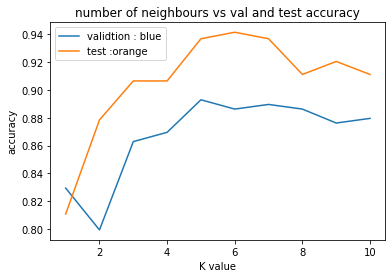

In [211]:
val_accuracy = []
test_accuracy = []
error_rate = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred_val_knn = knn.predict(x_val)
  y_pred_knn_test = knn.predict(x_test)
  val_accuracy.append(accuracy_score(y_val,y_pred_val_knn))
  test_accuracy.append(accuracy_score(y_test,y_pred_knn_test))
  error_rate.append(np.mean(y_pred_knn_test != y_test))
# for i in range
print("Max Validation Accuracy :- ",max(val_accuracy))
print("Max test Accuracy :- ",max(test_accuracy))
print("Min error_rate :- ",min(error_rate))

plt.plot(list(range(1,11)),val_accuracy)
plt.plot(list(range(1,11)),test_accuracy)
plt.title('number of neighbours vs val and test accuracy')
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.legend(labels=['validtion : blue' , 'test :orange'])

## **e- Analysis the training time when use different number of training samples.**

Text(0, 0.5, 'error rate')

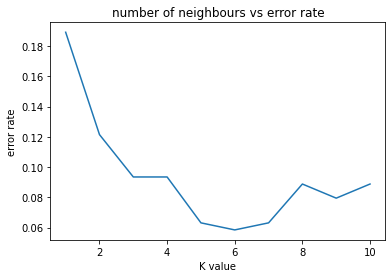

In [212]:
plt.plot(list(range(1,11)),error_rate)
plt.title('number of neighbours vs error rate')
plt.xlabel('K value')
plt.ylabel('error rate')


In [213]:
# apply 10 % of training and k = 2
import time
x_train_prc , y_train_prc = percentage(x_train , y_train ,0.1)
start_10_t =time.time()
knn_10 = KNeighborsClassifier(n_neighbors=2)
knn_10.fit(x_train_prc,y_train_prc)
end_10_t =time.time()
total_time_t_10 = abs(end_10_t - start_10_t)


In [214]:
start_10_test = time.time()
y_pred = knn_10.predict(x_test)
end_10_test = time.time()
total_time_test_10 = abs(start_10_test - end_10_test)

In [215]:
start_10_test

1655224913.2653127

In [216]:
end_10_test

1655224913.2882903

In [217]:
total_time_test_10

0.022977590560913086

In [218]:
#apply 100% of the whole training set and K = 2
start_100_t =time.time()
knn_100 = KNeighborsClassifier(n_neighbors=2)
knn_100.fit(x_train,y_train)
end_100_t =time.time()
total_time_t_100 = abs(end_100_t - start_100_t)

In [219]:
start_100_test = time.time()
y_pred = knn_100.predict(x_test)
end_100_test = time.time()
total_time_test_100 = abs(start_100_test - end_100_test)

In [220]:
start_100_test

1655224913.3789108

In [221]:
end_100_test

1655224913.4075544

In [222]:
total_time_test_100

0.02864360809326172

In [223]:
#apply 10% of the whole training set and K = 10
x_train_prc_10 , y_train_prc_10 = percentage(x_train , y_train ,0.1)
start_10_t_10 =time.time()
knn_10_10 = KNeighborsClassifier(n_neighbors=10)
knn_10_10.fit(x_train_prc,y_train_prc)
end_10_t_10 =time.time()
total_time_t_10_10 = abs(end_10_t_10 - start_10_t_10)

In [224]:
start_10_test_10 = time.time()
y_pred = knn_10_10.predict(x_test)
end_10_test_10 = time.time()
total_time_test_10_10 = abs(start_10_test_10 - end_10_test_10)

In [225]:
start_10_test_10

1655224913.491071

In [226]:
end_10_test_10

1655224913.5141633

In [227]:
total_time_test_10_10

0.023092269897460938

In [228]:
#apply 100% of the whole training set and K = 10
start_100_t_10 =time.time()
knn_100_10 = KNeighborsClassifier(n_neighbors=10)
knn_100_10.fit(x_train,y_train)
end_100_t_10 =time.time()
total_time_t_100_10 = abs(end_100_t_10 - start_100_t_10)

In [229]:
start_100_test_10 = time.time()
y_pred = knn_100_10.predict(x_test)
end_100_test_10 = time.time()
total_time_test_100_10 = abs(start_100_test_10 - end_100_test_10)

In [230]:
start_100_test_10

1655224913.5868094

In [231]:
end_100_test_10

1655224913.6113305

In [232]:
total_time_test_100_10

0.0245211124420166

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

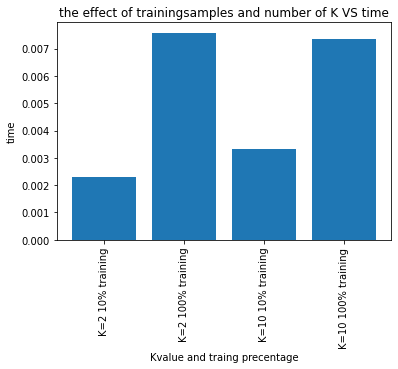

In [233]:
#Plot a bar chart figure to show the prediction time on the testing set
k= ['K=2 10% training','K=2 100% training','K=10 10% training','K=10 100% training']
training_time=[total_time_t_10,total_time_t_100,total_time_t_10_10,total_time_t_100_10]
plt.bar(k,training_time)
plt.title('the effect of trainingsamples and number of K VS time')
plt.xlabel('Kvalue and traing precentage')
plt.ylabel('time')
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

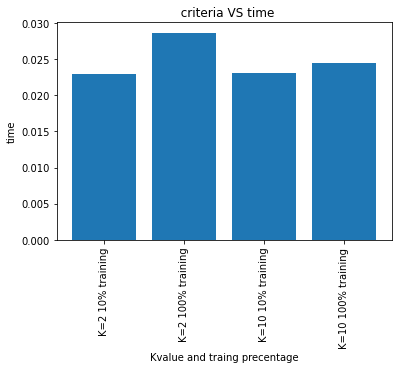

In [234]:
test_time = [total_time_test_10,total_time_test_100,total_time_test_10_10,total_time_test_100_10]
plt.bar(k,test_time)
plt.title('  criteria VS time')
plt.xlabel('Kvalue and traing precentage')
plt.ylabel('time')
plt.xticks(rotation = 90)

#**f- from the experirments on points c, d, e we can say that:**
 

1. when the number of k decreased,  it can leads to an overfitting.
2. When the number of k increased,  it can leads to an underfitting.
3. We must choose the best number of K to prevent overfitting or underfitting.
4. When the number of training data increases, the time will increase because it is a non-parametric model, and it is not limited to that, so it causes better results.
